# Feautre engineering

- 훌륭한 기계 학습 모델을 구축하는 가장 중요한 단계 중 하나
    - 상호 정보를 갖는 가장 중요한 역할을 하는 feature를 결정하는 것을 배운다
    - 실생활 문제에서 새로운 feature를 invent발명한다.
    - 고차원의 카테고리들을 target encoding으로 encode한다.
    - k-means 군집화를 통해 segment를 만든다.
    - pca(주성분 분석)를 통해 데이터의 변형을 특성으로 분해한다.
   

### goal of feature engineering
- 모델의 예측 성능 향상
- 계산 또는 데이터 요구 감소
- 결과의 해석 가능성 향샹
- **모델이 학습을 잘하지 못하더라도 Feature engineering을 통해 학습을 잘하는 데이터셋으로 변환하여 모델의 퍼포먼스 확보 가능**

# Mutual Information - 상호 정보

- 새로운 데이터셋을 보는 것은 매우 압도적일 수 있다.
- 설명 없이 수천개의 feature들을 어떻게 해야할까??

 
- 먼저 feature과 target간의 연관성을 측정하는 기능인 feature utility metric을 사용해서 feature간의 순위를 구성한다.
    - 이러한 metric을 "mutal information"이라 한다.
    - 상관 관계와 매우 유사하며, 두 수량 간의 관계를 측정하는 것을 뜻함
    - 상관 관계는 선형 관계만 감지하지만, Mutual Information은 모든 종류의 관계를 감지할 수 있다는 것
    - 아직 어떤 모델을 사용하고 싶은지 모를 때 기능 개발을 시작할 때 특히 유용함
        - 장점
            - 사용 및 해석이 쉬움
            - 계산 효율성
            - 이론적 근거 충분
            - 과적합에 강함
            - 모든 종류의 관계 감지 가능
            
            
- Mutual Information은 불확실성의 관점에서 관계를 묘사한다. (불확실성을 정보이론에서 "entorpy"라 함)
    - 즉, 두 수량 간의 MI는 한 수량에 대한 지식이 다른 수량에 대한 불확실성을 줄이는 정도의 척도이다.
        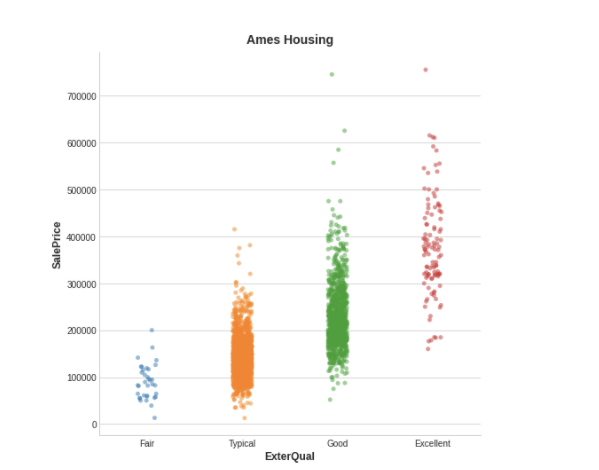
        
- 위의 그림에서 ExterQual 변수를 아는 것은 각각의 카테고리별 시점에서 특정 범위 내로 집중되는 경향이 있기에 Saleprice 에 대한 불확실성이 줄어든다.(확실해진다.)
- 두 변수가 함께 가지고 있는 상호 정보는 ExterQual 의 4가지 값이 담당하는 SalePrice의 불확실성의 평균 감소이다.
    - 예를 들어, fair는 typical보다 덜 자주 발생하므로 fair는 MI score에서 더 낮은 weight(가중치)를 가진다.
    
- 특징
    - 최소값 : 0 (아무 관계 X)
    - 최대값 : 무한대 (2이상인 경우 거의 없음)
    - 변수 하나만으로 INFORMATIVE할 수 있지만, 다른 변수와 합쳐져서 유익해지진다.
    - MI가 높다고 모두 신뢰하기는 어렵다. 일단 MI 가 높으면 feature를 변환해보고자 함

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


df = pd.read_csv("data/ames.csv")

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

- plot graph

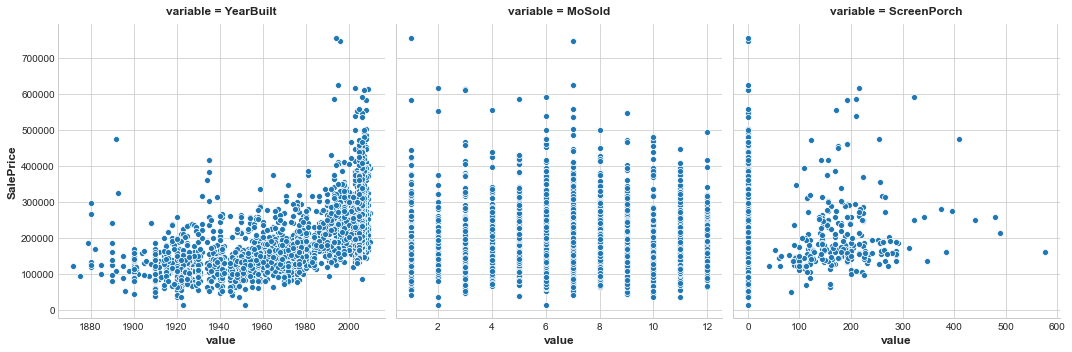

In [3]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


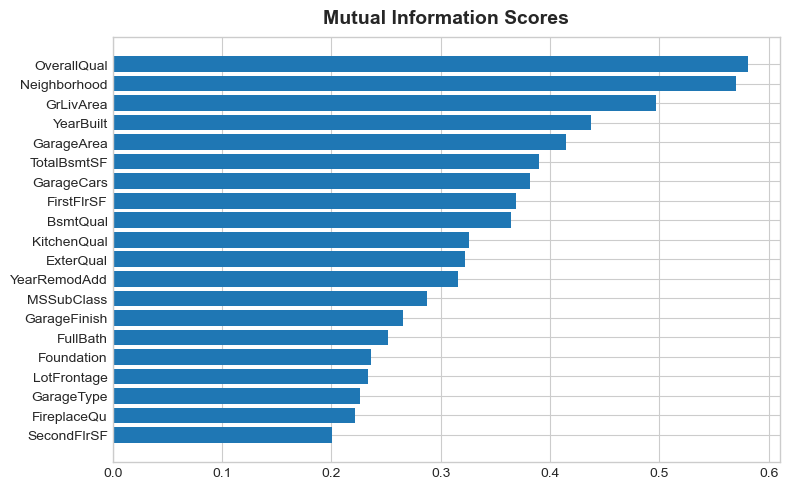

In [7]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20